In [75]:
import numpy as np
from math import cos, sin
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import YouTubeVideo
from scipy.stats import norm

## State Vector - Constant Acceleration

Constant Acceleration Model for Motion in 3D

$$x= \left[ \matrix{ x \\ y \\ z \\ \dot x \\ \dot y \\ \dot z} \right]$$


Formal Definition:

$$x_{k+1} = A \cdot x_{k} + B \cdot u_k$$

Hence, we have no control input $u$.

$$x_{k+1} = \begin{bmatrix}1 & 0 & 0 & \Delta t & 0 & 0 & \frac{1}{2}\Delta t^2 & 0 & 0 \\ 0 & 1 & 0 & 0 & \Delta t & 0 & 0 & \frac{1}{2}\Delta t^2 & 0 \\ 0 & 0 & 1 & 0 & 0 & \Delta t & 0 & 0 & \frac{1}{2}\Delta t^2 \\ 0 & 0 & 0 & 1 & 0 & 0 & \Delta t & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & \Delta t & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & \Delta t \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix} \cdot \begin{bmatrix} x \\ y \\ z \\ \dot x \\ \dot y \\ \dot z \\ \ddot x \\ \ddot y \\ \ddot z\end{bmatrix}_{k}$$

$$y = H \cdot x$$

Position ($x$ & $y$ & $z$) is measured with vision system:

$$y = \begin{bmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \end{bmatrix} \cdot x$$

#### Initial Uncertainty

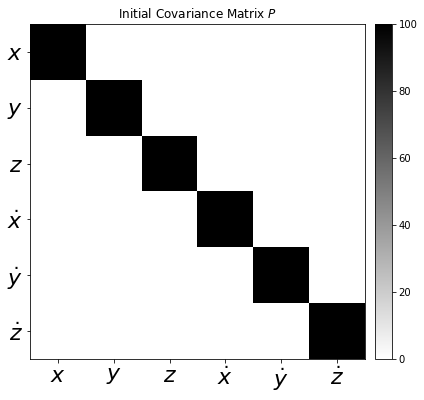

In [300]:
P = 100.0*np.eye(6)

fig = plt.figure(figsize=(6, 6))
im = plt.imshow(P, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Initial Covariance Matrix $P$')
ylocs, ylabels = plt.yticks()
# set the locations of the yticks
plt.yticks(np.arange(7))
# set the locations and labels of the yticks
plt.yticks(np.arange(6),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$'), fontsize=22)

xlocs, xlabels = plt.xticks()
# set the locations of the yticks
plt.xticks(np.arange(7))
# set the locations and labels of the yticks
plt.xticks(np.arange(6),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$'), fontsize=22)

plt.xlim([-0.5,5.5])
plt.ylim([5.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)


plt.tight_layout()

## Dynamic Matrix

In [77]:
dt = 0.01 # Time Step between Filter Steps

A = np.matrix([[1.0, dt, 0.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, dt, 0.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, dt, 0.0, 0.0],
              [0.0, 0.0, 0.0, 1.0, dt, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, dt],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])
print(A.shape)

(6, 6)


## Measurement Matrix
Here the position ($x$, $y$, and $z$) is measured.

In [78]:
H = np.matrix([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 1.0, 0.0, 0.0, 0.0]])
print(H, H.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]] (3, 6)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] (3, 3)


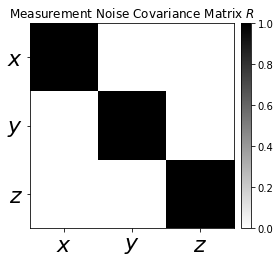

In [248]:
rp = 1.0**2  # Noise of Position Measurement
R = np.matrix([[rp, 0.0, 0.0],
               [0.0, rp, 0.0],
               [0.0, 0.0, rp]])
print(R, R.shape)

fig = plt.figure(figsize=(4, 4))
im = plt.imshow(R, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Measurement Noise Covariance Matrix $R$')
ylocs, ylabels = plt.yticks()
# set the locations of the yticks
plt.yticks(np.arange(4))
# set the locations and labels of the yticks
plt.yticks(np.arange(3),('$x$', '$y$', '$z$'), fontsize=22)

xlocs, xlabels = plt.xticks()
# set the locations of the yticks
plt.xticks(np.arange(4))
# set the locations and labels of the yticks
plt.xticks(np.arange(3),('$x$', '$y$', '$z$'), fontsize=22)

plt.xlim([-0.5,2.5])
plt.ylim([2.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)

plt.tight_layout()

In [249]:
from sympy import Symbol, Matrix
from sympy.interactive import printing
printing.init_printing()
dts = Symbol('\Delta t')
Qs = Matrix([[0.5*dts**2],[0.5*dts**2],[0.5*dts**2],[dts],[dts],[dts]])
Qs*Qs.T

⎡             4               4               4              3              3 
⎢0.25⋅\Delta t   0.25⋅\Delta t   0.25⋅\Delta t   0.5⋅\Delta t   0.5⋅\Delta t  
⎢                                                                             
⎢             4               4               4              3              3 
⎢0.25⋅\Delta t   0.25⋅\Delta t   0.25⋅\Delta t   0.5⋅\Delta t   0.5⋅\Delta t  
⎢                                                                             
⎢             4               4               4              3              3 
⎢0.25⋅\Delta t   0.25⋅\Delta t   0.25⋅\Delta t   0.5⋅\Delta t   0.5⋅\Delta t  
⎢                                                                             
⎢            3               3               3             2              2   
⎢0.5⋅\Delta t    0.5⋅\Delta t    0.5⋅\Delta t      \Delta t       \Delta t    
⎢                                                                             
⎢            3               3               3      

In [362]:
sa = 0.0
G = np.matrix([[1/2.0*dt**2],
               [1/2.0*dt**2],
               [1/2.0*dt**2],
               [dt],
               [dt],
               [dt]])
Q = G*G.T*sa**2

print(Q.shape)

(6, 6)


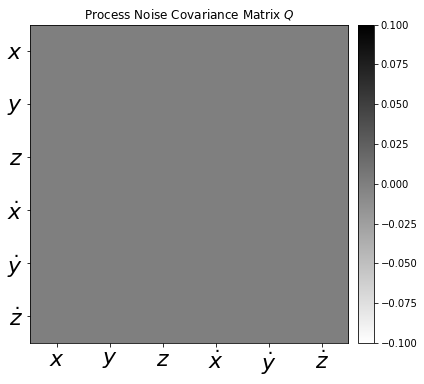

In [363]:
fig = plt.figure(figsize=(6, 6))
im = plt.imshow(Q, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Process Noise Covariance Matrix $Q$')
ylocs, ylabels = plt.yticks()
# set the locations of the yticks
plt.yticks(np.arange(10))
# set the locations and labels of the yticks
plt.yticks(np.arange(9),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$'), fontsize=22)

xlocs, xlabels = plt.xticks()
# set the locations of the yticks
plt.xticks(np.arange(7))
# set the locations and labels of the yticks
plt.xticks(np.arange(9),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$'), fontsize=22)

plt.xlim([-0.5,5.5])
plt.ylim([5.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)


plt.tight_layout()

In [364]:
B = np.matrix([[0.0],
               [0.0],
               [0.0],
               [0.0],
               [0.0],
               [0.0]])
print(B, B.shape)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] (6, 1)


In [365]:
u = 0.0

In [366]:
I = np.eye(6)
print(I, I.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]] (6, 6)


## Measurements
Create the dummy camera movement/vision data.

In [382]:
Hz = 100.0 # Frequency of Vision System
dt = 1.0/Hz
T = 20.0 # s measuremnt time
m = int(T/dt) # number of measurements

px= 0.0 # x Position Start
py= 0.0 # y Position Start
pz= 0.0 # z Position Start

cpx= 0.0 # x Camera Position Start
cpy= 0.0 # y Camera Position Start
cpz= 0.0 # z Camera Position Start

vx = 0.0 # m/s Velocity
vy = 0.0 # m/s Velocity
vz = 0.0 # m/s Velocity

cvx = 0.0 # m/s Camera Initial Velocity
cvy = 0.0 # m/s Camera Initial Velocity
cvz = 0.0 # m/s Camera Initial Velocity

w1 = 1.0 # rad/s Camera Angular Velocity
w2 = 1.0 # rad/s Camera Angular Velocity (around z)
r = 5.0 # m Camera Radius

Xr=[]
Yr=[]
Zr=[]
cXr=[]
cYr=[]
cZr=[]
for i in range(int(m)):
    cpx = r*cos(i*dt*w1)*sin(i*dt*w2)
    cpy = r*cos(i*dt*w1)*sin(i*dt*w2)
    cpz = r*cos(i*dt*w1)
    
#     cvy = r*w*cos(i*dt*w)
#     cvx = r*w*sin(i*dt*w)
    
    px = cpx - r*cos(i*dt*w1)*sin(i*dt*w2)
    py = cpy - r*cos(i*dt*w1)*sin(i*dt*w2)
    pz = cpz - r*cos(i*dt*w1)
        
    Xr.append(px)
    Yr.append(py)
    Zr.append(pz)
    
    cXr.append(cpx)
    cYr.append(cpy)
    cZr.append(cpz)

Add noise to the generated data.

In [383]:
sp= 0.3 # Sigma for position noise
csp = 0.1

# Skewed along the x-axis
Xm = Xr + sp * (np.random.randn(m))
Ym = Yr + sp * (np.random.randn(m))
Zm = Zr + sp * (np.random.randn(m))

cXm = cXr + csp * (np.random.randn(m))
cYm = cYr + csp * (np.random.randn(m))
cZm = cZr + csp * (np.random.randn(m))

Plot the data.

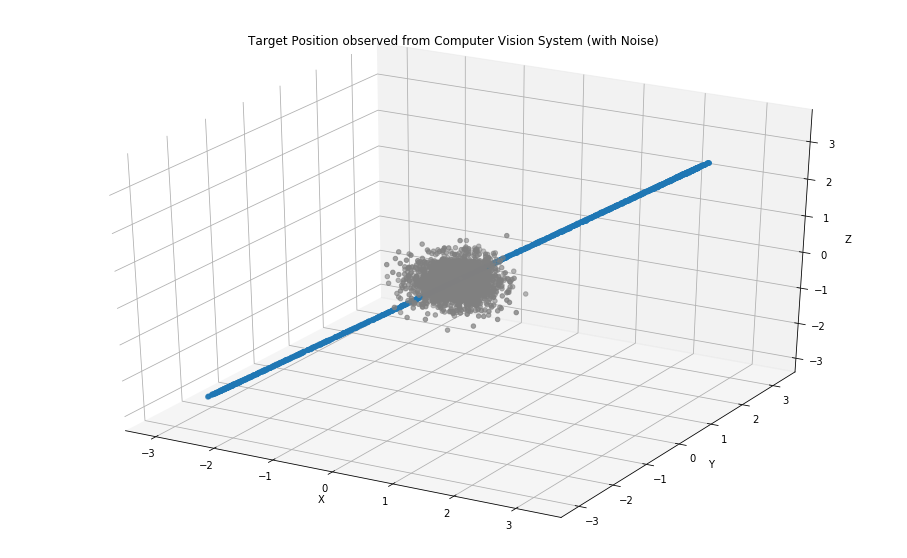

In [397]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cXm,cYm,cXm, label='Camera Measured Position')
ax.scatter(Xm, Ym, Zm, c='gray')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Target Position observed from Computer Vision System (with Noise)')

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# Axis equal
max_range = np.array([cXm.max()-cXm.min(), cYm.max()-cYm.min(), cZm.max()-cZm.min()]).max() / 3.0
mean_x = cXm.mean()
mean_y = cYm.mean()
mean_z = cZm.mean()
ax.set_xlim(mean_x - max_range, mean_x + max_range)
ax.set_ylim(mean_y - max_range, mean_y + max_range)
ax.set_zlim(mean_z - max_range, mean_z + max_range)
#plt.savefig('BallTrajectory-Computervision.png', dpi=150, bbox_inches='tight')

In [385]:
measurements = np.vstack((Xm,Ym,Zm))
print(measurements.shape)

(3, 2000)


### Initial State

In [386]:
x = np.matrix([0.0, 0.0, 0.0, 0.0, 0.0, 0.0]).T
print(x, x.shape)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]] (6, 1)


In [387]:
# Preallocation for Plotting
xt = []
yt = []
zt = []
dxt= []
dyt= []
dzt= []
ddxt=[]
ddyt=[]
ddzt=[]
Zx = []
Zy = []
Zz = []
Px = []
Py = []
Pz = []
Pdx= []
Pdy= []
Pdz= []
Pddx=[]
Pddy=[]
Pddz=[]
Kx = []
Ky = []
Kz = []
Kdx= []
Kdy= []
Kdz= []
Kddx=[]
Kddy=[]
Kddz=[]

## Kalman Filter

In [388]:
hitplate=False
for filterstep in range(m):
    # Time Update (Prediction)
    # ========================
    # Project the state ahead
    x = A*x + B*u
    
    # Project the error covariance ahead
    P = A*P*A.T + Q    
    
    
    # Measurement Update (Correction)
    # ===============================
    # Compute the Kalman Gain
    S = H*P*H.T + R
    K = (P*H.T) * np.linalg.pinv(S)

    
    # Update the estimate via z
    Z = measurements[:,filterstep].reshape(H.shape[0],1)
    y = Z - (H*x)                            # Innovation or Residual
    x = x + (K*y)
    
    # Update the error covariance
    P = (I - (K*H))*P
    
   
    
    # Save states for Plotting
    xt.append(float(x[0]))
    yt.append(float(x[1]))
    zt.append(float(x[2]))
    dxt.append(float(x[3]))
    dyt.append(float(x[4]))
    dzt.append(float(x[5]))
    
    Zx.append(float(Z[0]))
    Zy.append(float(Z[1]))
    Zz.append(float(Z[2]))
    Px.append(float(P[0,0]))
    Py.append(float(P[1,1]))
    Pz.append(float(P[2,2]))
    Pdx.append(float(P[3,3]))
    Pdy.append(float(P[4,4]))
    Pdz.append(float(P[5,5]))
    Kx.append(float(K[0,0]))
    Ky.append(float(K[1,0]))
    Kz.append(float(K[2,0]))
    Kdx.append(float(K[3,0]))
    Kdy.append(float(K[4,0]))
    Kdz.append(float(K[5,0]))

## Plots

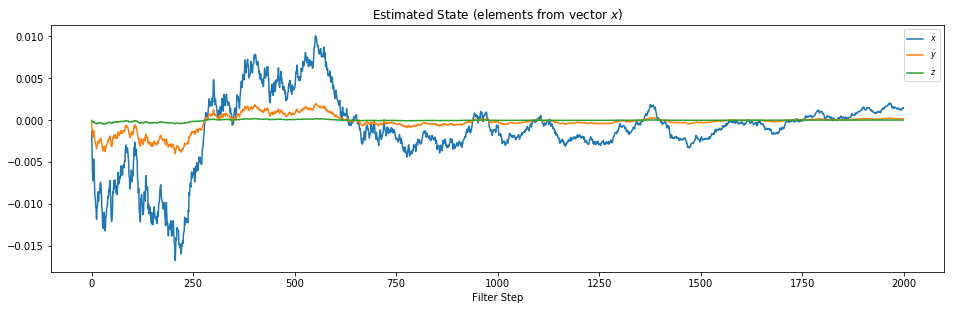

In [389]:
fig = plt.figure(figsize=(16,10))
plt.subplot(211)
plt.title('Estimated State (elements from vector $x$)')
plt.plot(range(len(measurements[0])),dxt, label='$\dot x$')
plt.plot(range(len(measurements[0])),dyt, label='$\dot y$')
plt.plot(range(len(measurements[0])),dzt, label='$\dot z$')
plt.legend(loc='best',prop={'size':8})

plt.xlabel('Filter Step')
plt.ylabel('')
plt.legend(loc='best',prop={'size':8})

### Uncertainty

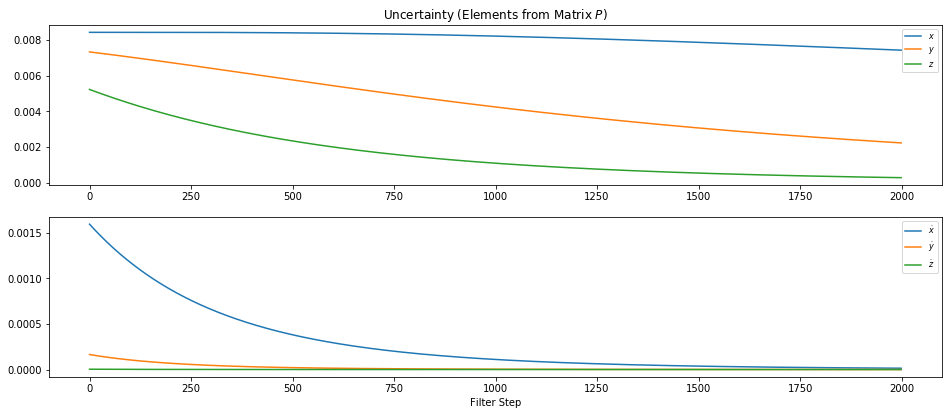

In [390]:
fig = plt.figure(figsize=(16,10))
plt.subplot(311)
plt.plot(range(len(measurements[0])),Px, label='$x$')
plt.plot(range(len(measurements[0])),Py, label='$y$')
plt.plot(range(len(measurements[0])),Pz, label='$z$')
plt.title('Uncertainty (Elements from Matrix $P$)')
plt.legend(loc='best',prop={'size':8})
plt.subplot(312)
plt.plot(range(len(measurements[0])),Pdx, label='$\dot x$')
plt.plot(range(len(measurements[0])),Pdy, label='$\dot y$')
plt.plot(range(len(measurements[0])),Pdz, label='$\dot z$')

plt.xlabel('Filter Step')
plt.ylabel('')
plt.legend(loc='best',prop={'size':8})

### Kalman Gains

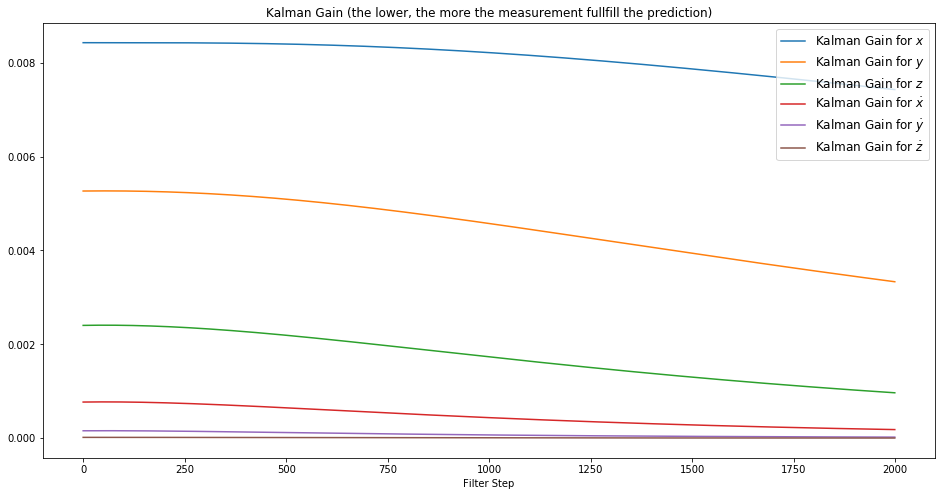

In [391]:
fig = plt.figure(figsize=(16,8))
plt.plot(range(len(measurements[0])),Kx, label='Kalman Gain for $x$')
plt.plot(range(len(measurements[0])),Ky, label='Kalman Gain for $y$')
plt.plot(range(len(measurements[0])),Kz, label='Kalman Gain for $z$')
plt.plot(range(len(measurements[0])),Kdx, label='Kalman Gain for $\dot x$')
plt.plot(range(len(measurements[0])),Kdy, label='Kalman Gain for $\dot y$')
plt.plot(range(len(measurements[0])),Kdz, label='Kalman Gain for $\dot z$')

plt.xlabel('Filter Step')
plt.ylabel('')
plt.title('Kalman Gain (the lower, the more the measurement fullfill the prediction)')
plt.legend(loc='best',prop={'size':12})

### Covariance Matrix

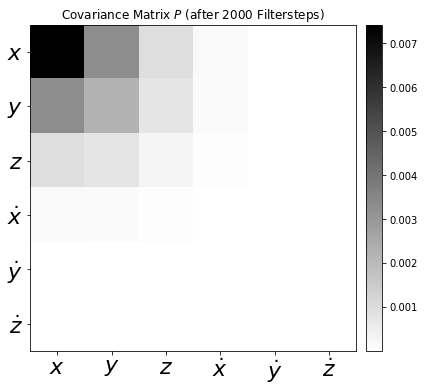

In [392]:
fig = plt.figure(figsize=(6, 6))
im = plt.imshow(P, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Covariance Matrix $P$ (after %i Filtersteps)' % m)
ylocs, ylabels = plt.yticks()
# set the locations of the yticks
plt.yticks(np.arange(10))
# set the locations and labels of the yticks
plt.yticks(np.arange(9),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$'), fontsize=22)

xlocs, xlabels = plt.xticks()
# set the locations of the yticks
plt.xticks(np.arange(7))
# set the locations and labels of the yticks
plt.xticks(np.arange(9),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$'), fontsize=22)

plt.xlim([-0.5,5.5])
plt.ylim([5.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)


plt.tight_layout()

### Position in X/Z Plane

Text(0, 0.5, 'Y ($m$)')

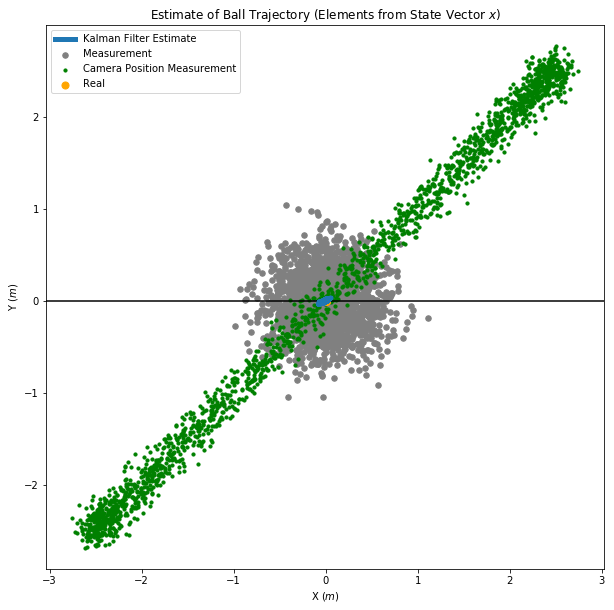

In [393]:
fig = plt.figure(figsize=(10,10))

plt.scatter(Xm,Ym, label='Measurement', c='gray', s=30)
plt.scatter(cXm,cYm, label='Camera Position Measurement', c='green', s=10)
plt.scatter(Xr, Yr, label='Real', s=50.0, c='orange')
plt.plot(xt,zt, label='Kalman Filter Estimate', c='tab:blue', zorder=10, lw=5)
plt.title('Estimate of Ball Trajectory (Elements from State Vector $x$)')
plt.legend(loc='best',prop={'size':10})
plt.axhline(0, color='k')
plt.axis('equal')
plt.xlabel('X ($m$)')
plt.ylabel('Y ($m$)')
# plt.ylim(0, 2);
# plt.savefig('Kalman-Filter-CA-Ball-StateEstimated.png', dpi=150, bbox_inches='tight')

### Position in 3D

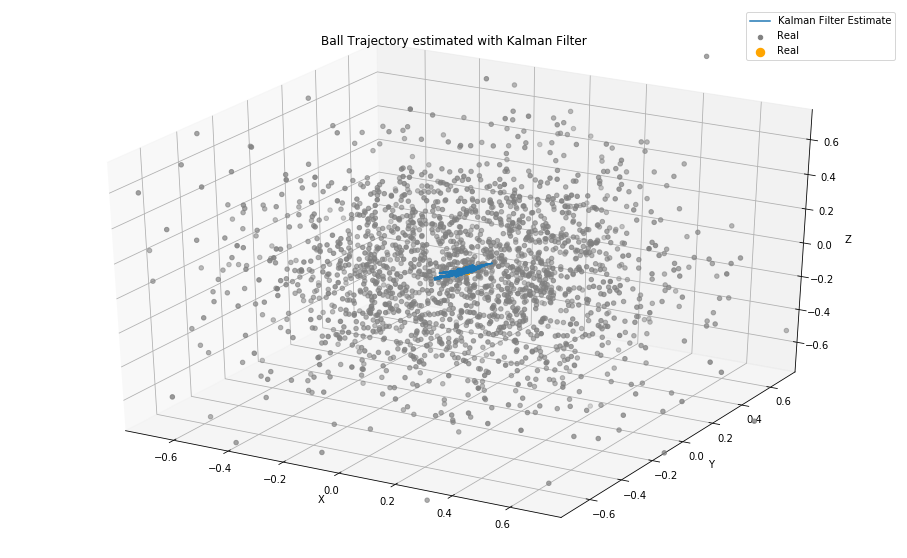

In [394]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xm, Ym, Zm, label='Real', c='grey', zorder=10)
ax.plot(xt,yt,zt, label='Kalman Filter Estimate', zorder=5)
ax.scatter(Xr, Yr, Zr, label='Real', linewidth=5.0, c='orange', zorder=15)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Ball Trajectory estimated with Kalman Filter')

# Axis equal
max_range = np.array([Xm.max()-Xm.min(), Ym.max()-Ym.min(), Zm.max()-Zm.min()]).max() / 3.0
mean_x = Xm.mean()
mean_y = Ym.mean()
mean_z = Zm.mean()
ax.set_xlim(mean_x - max_range, mean_x + max_range)
ax.set_ylim(mean_y - max_range, mean_y + max_range)
ax.set_zlim(mean_z - max_range, mean_z + max_range)
plt.savefig('Kalman-Filter-CA-Ball-Trajectory.png', dpi=150, bbox_inches='tight')

In [395]:
dist = np.sqrt((np.array(Xr)-xt)**2 + (np.array(Yr)-yt)**2 + (np.array(Zr)-zt)**2)
print('Estimated average position is %.2fm away from ball position.' % np.mean(dist))
print('Estimated last position is %.2fm away from ball position.' % dist[-1])

Estimated average position is 0.03m away from ball position.
Estimated last position is 0.03m away from ball position.


Text(0.5, 1.0, 'Kalman Error vs. Measured Variance')

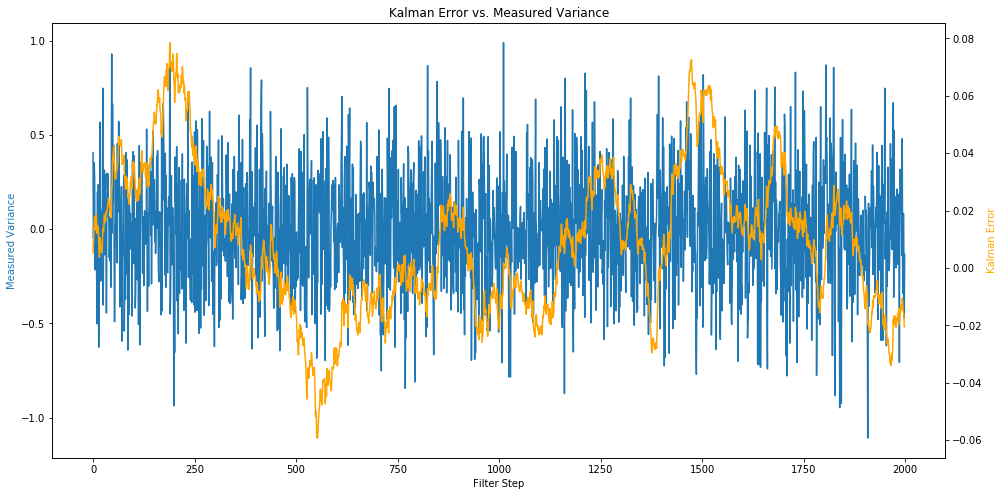

In [396]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.plot(range(len(measurements[0])), np.array(Xr)-Xm)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(range(len(measurements[0])),np.array(Xr)-xt, c='orange')

ax1.set_xlabel('Filter Step')
ax1.set_ylabel('Measured Variance', color='tab:blue')
ax2.set_ylabel('Kalman Error', color='orange')
plt.title('Kalman Error vs. Measured Variance')
